In [11]:
from   scipy.io   import  loadmat
import numpy      as      np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from scipy.stats import bootstrap
from scipy.ndimage.filters import gaussian_filter1d

import warnings
warnings.filterwarnings("ignore")

def gradient_hbar(values,y, x0, x1,vmin = -1,vmax = 1, ax=None, height=0.8, cmap=plt.cm.PuBu):
    ax = ax or plt.gca()

    im = ax.imshow(np.array(values).reshape(1, -1), 
              extent=(x0, x1, y - height / 2, y + height / 2),
              aspect = "auto",
              vmin = vmin,vmax = vmax,
              cmap=cmap)
    return im


PYTHON_PATH = "/Users/rb4174/Documents/projects/brain_dev_primates/altricial_brain_vocal_learning"

# Human

In [12]:
COLOR = "green"
SPECIE = "Human"

In [13]:
df_events = pd.read_excel("{0}/data/developmental_stages_events.xlsx".format(PYTHON_PATH),index_col=False)
df_events = df_events[df_events.specie == SPECIE]
gestation_weeks = df_events[df_events.event == "gestation"]["avg_wkspc"].values[0]
gestation_weeks_sd = df_events[df_events.event == "gestation"]["sd_(days)"].values[0]/7

df_fits = pd.read_pickle("{0}/data/derivatives_with_error.pkl".format(PYTHON_PATH)) 
df_fits = df_fits[df_fits.specie == SPECIE]
df_fits.head()

,specie,x_dydx,y_dydx,y_dydx_low_95Percentil,y_dydx_max_95Percentil,all_y
2,Human,"[0.0, 0.3784285714285714, 0.7568571428571428, ...","[0.34840073698411855, 0.34860120674782236, 0.3...","[0.03708012002879864, 0.037312303401767666, 0....","[0.7430481326545365, 0.7431191475201124, 0.743...","[[0.03481333868163789, 0.0349715362504214, 0.0..."


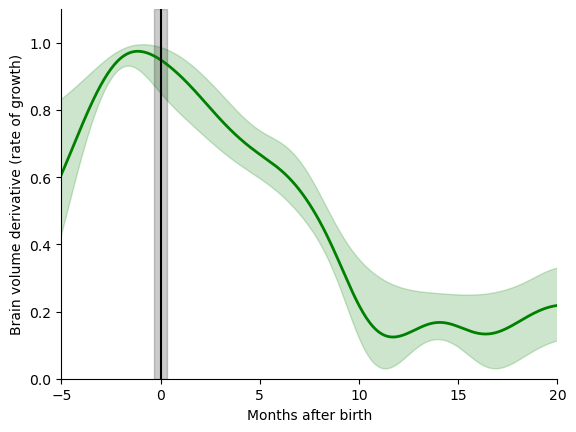

In [14]:
x = df_fits["x_dydx"].values[0]
y = df_fits["y_dydx"].values[0]
y_dydx_low_95Percentil = df_fits["y_dydx_low_95Percentil"].values[0]
y_dydx_max_95Percentil = df_fits["y_dydx_max_95Percentil"].values[0]

x = df_fits["x_dydx"].values[0]
y = gaussian_filter1d(df_fits["y_dydx"].values[0],sigma=10)
y_dydx_low_95Percentil = gaussian_filter1d(df_fits["y_dydx_low_95Percentil"].values[0],10)
y_dydx_max_95Percentil = gaussian_filter1d(df_fits["y_dydx_max_95Percentil"].values[0],10)


fig, ax = plt.subplots()

SCALE = (7/365)*12
x = (x - gestation_weeks)*SCALE

ax.plot(x,y, '-', color = COLOR,linewidth = 2)
ax.fill_between(x, y_dydx_low_95Percentil, y_dydx_max_95Percentil, color=COLOR, alpha=0.2)

ax.axvline(x = 0, color = "black",linestyle = '-',label="birth")
ax.axvspan(0 - gestation_weeks_sd*SCALE, 0 + gestation_weeks_sd*SCALE, alpha=0.2, color='black')

plt.xlim(-5,20)
plt.ylim(0,1.1)
sns.despine()
plt.ylabel('Brain volume derivative (rate of growth)')
plt.xlabel('Months after birth')
plt.show()

## Adding the windows

In [15]:
windows = {"source":["Kuhl_2004","Kuhl_2004"],
           "name":["Universal Speech Perception","Universal Speech Production"],
           "mean_lower":[0,0],
           "mean_upper":[8,10],
           "all_lower":[0,0],
           "all_upper":[0,0],
           "mean_lower_95CI_low":[0,0],
           "mean_lower_95CI_high":[0,0],
           "mean_upper_95CI_low":[0,0],
           "mean_upper_95CI_high":[0,0]
           }

windows = pd.DataFrame(windows)
windows.head()

,source,name,mean_lower,mean_upper,all_lower,all_upper,mean_lower_95CI_low,mean_lower_95CI_high,mean_upper_95CI_low,mean_upper_95CI_high
0,Kuhl_2004,Universal Speech Perception,0,8,0,0,0,0,0,0
1,Kuhl_2004,Universal Speech Production,0,10,0,0,0,0,0,0


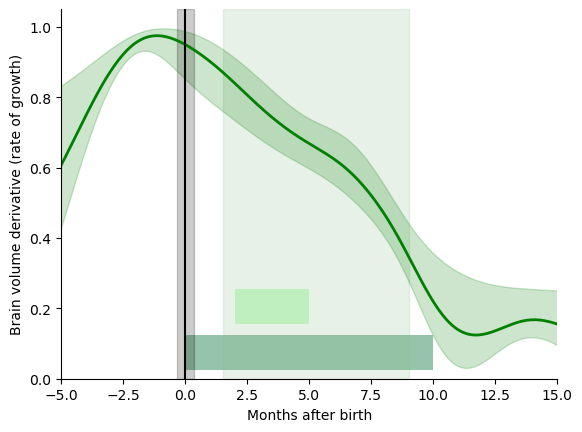

In [16]:
fig, ax = plt.subplots()

yloc = 0.1
color = "seagreen"
windows_df = windows[windows.name == "Universal Speech Production"]
ax.add_patch(Rectangle((windows_df["mean_lower"].item(), yloc - 0.075), (windows_df["mean_upper"].item() - windows_df["mean_lower"].item()),#xy, width, height,
                        0.1,alpha=0.5, facecolor=color)) # xy: Lower left point to start the rectangle plotting

#Milestones - learn self efficacy
#Infants thus learn the social efficacy of their vocalizations between 2 and 5 months of age, Elminger 2023
yloc = 0.23
color = "palegreen"
start_learng_self_efficacy = 2
end_learng_self_efficacy = 5
windows_df = windows[windows.name == "Universal Speech Production"]
ax.add_patch(Rectangle((start_learng_self_efficacy, yloc - 0.075), (end_learng_self_efficacy - start_learng_self_efficacy),#xy, width, height,
                        0.1,alpha=0.5, facecolor=color)) # xy: Lower left point to start the rectangle plotting

#Intersection window
windows_df = windows[windows.name == "Universal Speech Production"]
ax.axvspan(1.5, 9, alpha=0.2, color='darkseagreen')

#Derivative plot and birth
ax.plot(x,y, '-', color = COLOR,linewidth = 2)
ax.fill_between(x, y_dydx_low_95Percentil, y_dydx_max_95Percentil, color=COLOR, alpha=0.2)

ax.axvline(x = 0, color = "black",linestyle = '-',label="birth")
ax.axvspan(0 - gestation_weeks_sd*SCALE, 0 + gestation_weeks_sd*SCALE, alpha=0.2, color='black')

plt.xlim(-5,15)
plt.ylim(0,1.05)
sns.despine()
plt.ylabel('Brain volume derivative (rate of growth)')
plt.xlabel('Months after birth')
fig.savefig("{0}/figs/2D_human.pdf".format(PYTHON_PATH),dpi = 800)


# Marmoset

In [17]:
COLOR = "orange"
SPECIE = "Marmoset"

In [18]:
df_events = pd.read_excel("{0}/data/developmental_stages_events.xlsx".format(PYTHON_PATH),index_col=False)
df_events = df_events[df_events.specie == SPECIE]
gestation_weeks = df_events[df_events.event == "gestation"]["avg_wkspc"].values[0]
gestation_weeks_sd = df_events[df_events.event == "gestation"]["sd_(days)"].values[0]/7

df_fits = pd.read_pickle("{0}/data/derivatives_with_error.pkl".format(PYTHON_PATH)) 
df_fits = df_fits[df_fits.specie == SPECIE]
df_fits.head()

,specie,x_dydx,y_dydx,y_dydx_low_95Percentil,y_dydx_max_95Percentil,all_y
3,Marmoset,"[0.0, 0.05971428571428572, 0.11942857142857144...","[0.03828741619360039, 0.03829606954668027, 0.0...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.3529448859110883, 0.3529623881062456, 0.352...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."


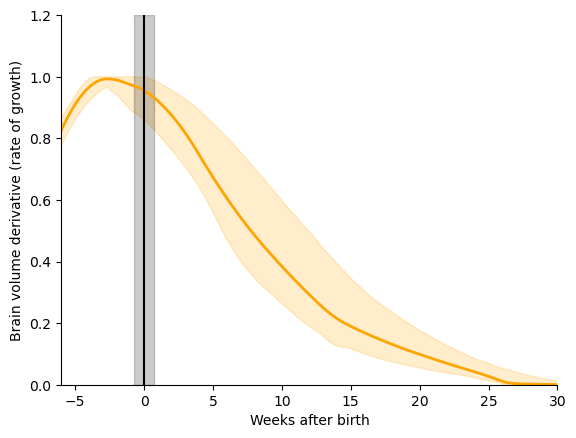

In [19]:
fig, ax = plt.subplots()


x = df_fits["x_dydx"].values[0] - gestation_weeks
y = df_fits["y_dydx"].values[0]
y_error_min = df_fits["y_dydx_low_95Percentil"].values[0]
y_error_max = df_fits["y_dydx_max_95Percentil"].values[0]

ax.plot(x,y, '-', color = "orange",linewidth = 2)
ax.fill_between(x, y_error_min, y_error_max, color="orange", alpha=0.2)

ax.axvline(x = 0, color = "black",linestyle = '-',label="birth")
ax.axvspan(0 - gestation_weeks_sd, 0 + gestation_weeks_sd, alpha=0.2, color='black')

plt.xlim(-6, 30)
plt.ylim(0,1.2)
sns.despine()
plt.ylabel('Brain volume derivative (rate of growth)')
plt.xlabel('Weeks after birth')
plt.show()

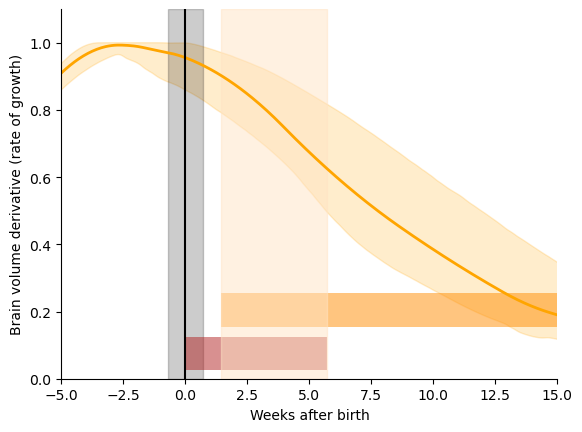

In [20]:
fig, ax = plt.subplots()

#Derivative curve
x = df_fits["x_dydx"].values[0] - gestation_weeks
y = df_fits["y_dydx"].values[0]
y_dydx_low_95Percentil = df_fits["y_dydx_low_95Percentil"].values[0]
y_dydx_max_95Percentil = df_fits["y_dydx_max_95Percentil"].values[0]

ax.plot(x,y, '-', color = "orange",linewidth = 2)
ax.fill_between(x, y_dydx_low_95Percentil, y_dydx_max_95Percentil, color="orange", alpha=0.2)

ax.axvline(x = 0, color = "black",linestyle = '-',label="birth")
ax.axvspan(0 - gestation_weeks_sd, 0 + gestation_weeks_sd, alpha=0.2, color='black')


#"Transitions were typically sharp, but their timing varied substantially across infants (~10 to 40 postnatal days)" Takahashi 2015
#Mostly producing cry
last_transition = 40/7 #postnatal days of age Description of the Yamamoto (1993) Marmoset Developmental Timeline
yloc = 0.1
color = "firebrick"
ax.add_patch(Rectangle((0, yloc - 0.075), ((last_transition)),#xy, width, height,
                         0.1,alpha=0.5, facecolor=color))

#Mostly producing phee
first_transition = 10/7 #postnatal days of age Description of the Yamamoto (1993) Marmoset Developmental Timeline
yloc = 0.23
color = "darkorange"
ax.add_patch(Rectangle((first_transition, yloc - 0.075), ((20)),#xy, width, height,
                         0.1,alpha=0.5, facecolor=color))

#Intersection window
ax.axvspan(first_transition, last_transition, alpha=0.5, color='bisque')

plt.xlim(-5, 15)
plt.ylim(0,1.1)
sns.despine()
plt.ylabel('Brain volume derivative (rate of growth)')
plt.xlabel('Weeks after birth')
plt.savefig("{0}/figs/2D_marmoset.pdf".format(PYTHON_PATH),dpi = 800)
plt.show()